In [10]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Load the datasets 
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('missing_value.csv')

# Transpose the dataframes to switch rows and columns
df1_t = df1.T
df2_t = df2.T

# Initialize the KNNImputer with desired number of neighbors
imputer = KNNImputer(n_neighbors=3)

# Perform the imputation row-wise by applying KNNImputer to the transposed dataframe
df2_imputed_t = pd.DataFrame(imputer.fit_transform(df2_t), columns=df2_t.columns, index=df2_t.index)

# Transpose back to the original orientation
df2_imputed = df2_imputed_t.T

# Ensure the columns and index are in the correct order after transposition
df2_imputed.columns = df2.columns
df2_imputed.index = df2.index

# Measure the performance for continuous data
mse = mean_squared_error(df1, df2_imputed)
mae = mean_absolute_error(df1, df2_imputed)
r2 = r2_score(df1.values.flatten(), df2_imputed.values.flatten())

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (coefficient of determination):", r2)

# Print the original, missing, and imputed dataframes
print("\nOriginal DataFrame (df1):")
print(df1)

print("\nDataFrame with Missing Values (df2):")
print(df2)

print("\nImputed DataFrame (df2_imputed):")
print(df2_imputed)



Mean Squared Error: 202350.48214285716
Mean Absolute Error: 141.10714285714286
R-squared (coefficient of determination): 0.9999360889535199

Original DataFrame (df1):
      2017    2018    2019
0   192274  201191  265954
1    25181   28523   26735
2     2024    2113    1904
3     4716    5544    8956
4     4105    4307    4481
5    16569   15405    4181
6     1939    2166    1622
7     2670    4952    5212
8    17937   18991   19968
9     4141    3139    2195
10      22      14      31
11      99     101     369
12      19       5      12
13      11       7       9

DataFrame with Missing Values (df2):
      2017      2018      2019
0   192274  201191.0  265954.0
1    25181   28523.0   26735.0
2     2024    2113.0    1904.0
3     4716       NaN    8956.0
4     4105    4307.0       NaN
5    16569   15405.0    4181.0
6     1939    2166.0    1622.0
7     2670    4952.0       NaN
8    17937   18991.0   19968.0
9     4141       NaN       NaN
10      22      14.0      31.0
11      99     101

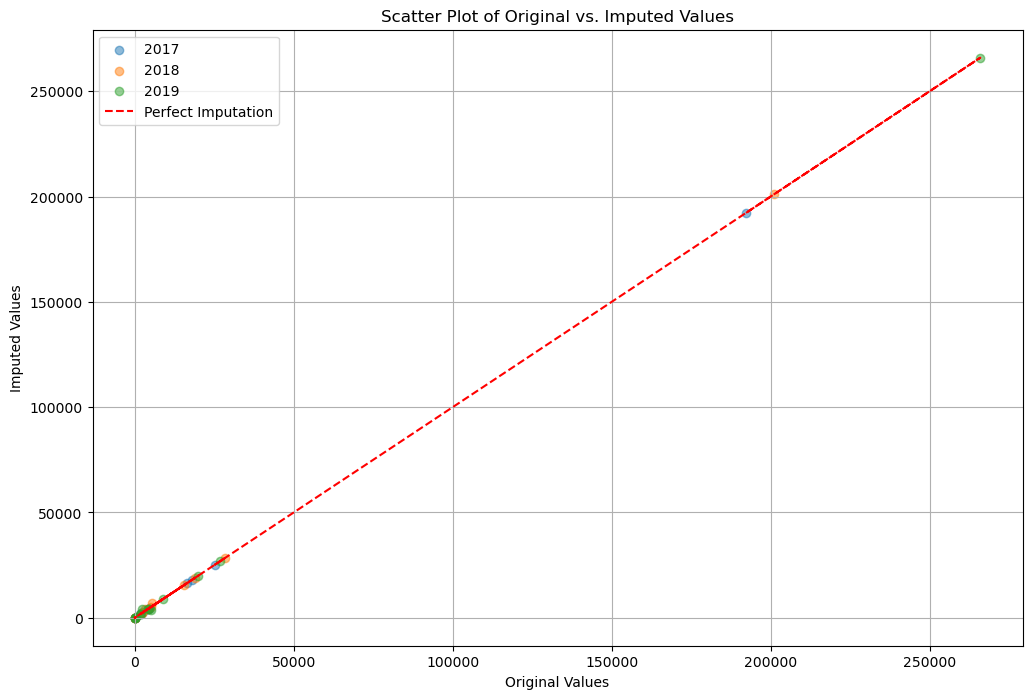

In [4]:
import matplotlib.pyplot as plt

# Create a single scatter plot for all columns
plt.figure(figsize=(12, 8))
for col in df1.columns:
    plt.scatter(df1[col], df2_imputed[col], label=col, alpha=0.5)

# Add diagonal line for reference
plt.plot(df1.values.flatten(), df1.values.flatten(), color='red', linestyle='--', label='Perfect Imputation')

# Set labels and title
plt.title('Scatter Plot of Original vs. Imputed Values')
plt.xlabel('Original Values')
plt.ylabel('Imputed Values')
plt.legend()
plt.grid(True)
plt.show()



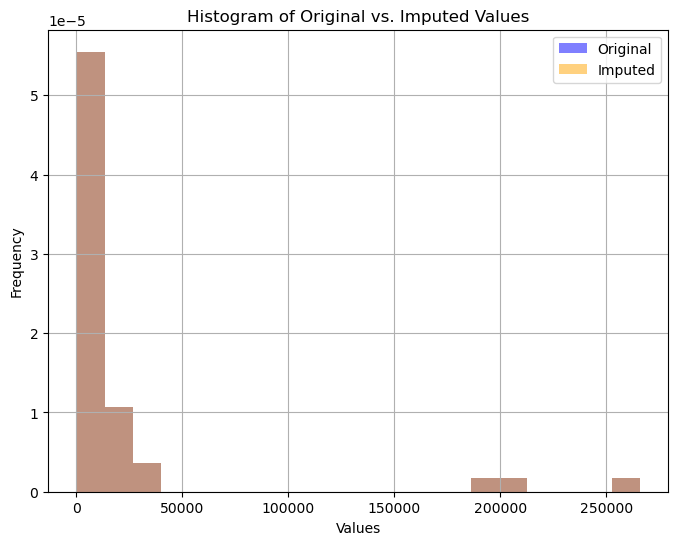

In [6]:
import matplotlib.pyplot as plt

# Stack values from all columns
stacked_original = df1.values.flatten()
stacked_imputed = df2_imputed.values.flatten()

# Create a single histogram
plt.figure(figsize=(8, 6))
plt.hist(stacked_original, bins=20, color='blue', alpha=0.5, label='Original', density=True)
plt.hist(stacked_imputed, bins=20, color='orange', alpha=0.5, label='Imputed', density=True)
plt.title('Histogram of Original vs. Imputed Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


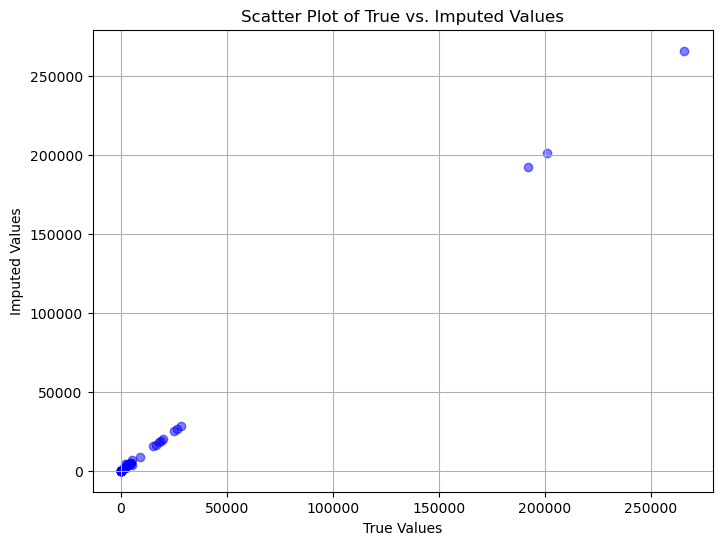

In [7]:
import matplotlib.pyplot as plt

# Flatten the dataframes
true_values = df1.values.flatten()
imputed_values = df2_imputed.values.flatten()

# Create a single scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(true_values, imputed_values, color='blue', alpha=0.5)
plt.title('Scatter Plot of True vs. Imputed Values')
plt.xlabel('True Values')
plt.ylabel('Imputed Values')
plt.grid(True)
plt.show()
